In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from defs import *

In [2]:
# leer archivo csv
df = pd.read_csv('insumos/ENOE_SDEMT423.csv', encoding='latin1')

In [3]:
# ========== PRUEBA COMPLETA DE METRICA_AJUSTADA ==========

# Preparar datos de ingreso (limpiar y filtrar)
ingreso = df['ing_x_hrs'].dropna()
ingreso = ingreso[ingreso > 0]  # Excluir valores cero o negativos

print("📊 ANÁLISIS AUTOMÁTICO DE DISTRIBUCIÓN DE INGRESOS")
print("=" * 60)

# ========== 1. PRUEBA CON FUNCIÓN AUTOMÁTICA ==========
print("\n🚀 1. EJECUTANDO ANÁLISIS AUTOMÁTICO...")

# Usar la función automática
resultado_auto = metrica_ajustada(ingreso)

# Extraer resultados
resultado = resultado_auto['resultado']
diagnostico = resultado_auto['diagnostico']

print(f"\n✅ Análisis completado para {diagnostico['n']:,} observaciones")

# ========== 2. MOSTRAR DIAGNÓSTICO ==========
print(f"\n🔍 2. DIAGNÓSTICO AUTOMÁTICO:")
print(f"   • Nivel de asimetría: {diagnostico['nivel_asimetria'].upper()}")
print(f"   • Asimetría de Bowley: {diagnostico['bowley_asimetria']:.4f}")
print(f"   • Sesgo normalizado: {diagnostico['sesgo_normalizado']:.4f}")
print(f"   • Exceso de curtosis: {diagnostico['exceso_curtosis']:.4f}")
print(f"   • Curtosis significativa: {'Sí' if diagnostico['curtosis_significativa'] else 'No'}")
print(f"   • Usar moda: {'Sí' if diagnostico['usar_moda'] else 'No'}")

if diagnostico['usar_moda']:
    print(f"   • Moda robusta: {'Sí' if diagnostico['moda_robusta'] else 'No'}")

# ========== 3. MOSTRAR PARÁMETROS ELEGIDOS ==========
params = diagnostico['parametros_elegidos']
print(f"\n⚙️  3. PARÁMETROS AUTOMÁTICOS ELEGIDOS:")
print(f"   • Método de mapeo: {params['method']}")
print(f"   • Método de pesos: {params['weight_method']}")
if params['weight_method'] == 'convex':
    print(f"   • Método convexo: {params['convex_method']}")
print(f"   • Medida robusta: {'Sí' if params['usar_medida_robusta'] else 'No'}")
print(f"   • Ajuste por curtosis: {'Sí' if params['use_kurtosis'] else 'No'}")
print(f"   • Ajuste por Bowley: {'Sí' if params['use_bowley'] else 'No'}")
print(f"   • Temperature: {params['temperature']}")
print(f"   • Alpha: {params['alpha']}")
print(f"   • Clip: {params['clip']}")

# ========== 4. MOSTRAR RESULTADOS FINALES ==========
print(f"\n📈 4. RESULTADOS DE TENDENCIA CENTRAL:")
print(f"   • Media: ${resultado['media']:,.2f}")
print(f"   • Mediana: ${resultado['mediana']:,.2f}")

if not pd.isna(resultado['moda']):
    print(f"   • Moda: ${resultado['moda']:,.2f}")
    print(f"   • Altura del pico: {resultado['altura_pico']:.3f}")
    print(f"   • Ancho del pico: {resultado['ancho_pico']:.3f}")

print(f"\n🎯 TENDENCIA CENTRAL PONDERADA: ${resultado['tendencia_ponderada']:,.2f}")

# ========== 5. MOSTRAR PESOS ASIGNADOS ==========
print(f"\n⚖️  5. PESOS ASIGNADOS:")
print(f"   • Peso Media: {resultado['peso_media']:.3f} ({resultado['peso_media']*100:.1f}%)")
print(f"   • Peso Mediana: {resultado['peso_mediana']:.3f} ({resultado['peso_mediana']*100:.1f}%)")

if resultado['peso_moda'] > 0:
    print(f"   • Peso Moda: {resultado['peso_moda']:.3f} ({resultado['peso_moda']*100:.1f}%)")

# ========== 6. COMPARACIÓN CON CONFIGURACIÓN MANUAL ==========
print(f"\n🔄 6. COMPARACIÓN CON CONFIGURACIÓN MANUAL BÁSICA:")

# Configuración manual básica (sin optimizaciones)
resultado_manual = metrica_ponderada(
    ingreso, 
    method="logistic",
    incluir_moda=False,
    use_kurtosis=False,
    use_bowley=False
)

print(f"   • Automático: ${resultado['tendencia_ponderada']:,.2f}")
print(f"   • Manual básico: ${resultado_manual['tendencia_ponderada']:,.2f}")
print(f"   • Diferencia: ${abs(resultado['tendencia_ponderada'] - resultado_manual['tendencia_ponderada']):,.2f}")

diferencia_porcentual = abs(resultado['tendencia_ponderada'] - resultado_manual['tendencia_ponderada']) / resultado_manual['tendencia_ponderada'] * 100
print(f"   • Diferencia %: {diferencia_porcentual:.2f}%")

# ========== 7. MÉTRICAS ADICIONALES ==========
print(f"\n📊 7. MÉTRICAS ESTADÍSTICAS ADICIONALES:")
print(f"   • MADN: ${resultado['MADN']:,.2f}")
print(f"   • Asimetría de Bowley: {resultado['bowley']:.4f}")
print(f"   • Exceso de curtosis: {resultado['exceso_kurtosis']:.4f}")

if not pd.isna(resultado['s_robusto']):
    print(f"   • Sesgo robusto: {resultado['s_robusto']:.4f}")

# ========== 8. RESUMEN EJECUTIVO ==========
print(f"\n📋 8. RESUMEN EJECUTIVO:")
print("=" * 40)

if diagnostico['nivel_asimetria'] == "alta":
    mensaje_asimetria = "La distribución presenta ALTA asimetría - se recomienda usar la tendencia ponderada"
elif diagnostico['nivel_asimetria'] == "moderada":
    mensaje_asimetria = "La distribución presenta asimetría MODERADA - la ponderación mejora la representatividad"
else:
    mensaje_asimetria = "La distribución es relativamente SIMÉTRICA - la media es más confiable"

print(f"✓ {mensaje_asimetria}")

if diagnostico['usar_moda']:
    print(f"✓ La moda fue incluida en el cálculo por ser {'robusta' if diagnostico['moda_robusta'] else 'aceptable'}")
else:
    print("✓ La moda fue excluida por falta de robustez o muestra insuficiente")

if params['use_kurtosis']:
    print("✓ Se aplicó penalización por exceso de curtosis")

if params['use_bowley']:
    print("✓ Se aplicó ajuste por asimetría de Bowley")

print(f"\n🎯 RECOMENDACIÓN: Usar ${resultado['tendencia_ponderada']:,.2f} como medida representativa")
print(f"   (vs ${resultado['media']:,.2f} de la media simple)")

print("\n" + "=" * 60)
print("✅ ANÁLISIS AUTOMÁTICO COMPLETADO")

📊 ANÁLISIS AUTOMÁTICO DE DISTRIBUCIÓN DE INGRESOS

🚀 1. EJECUTANDO ANÁLISIS AUTOMÁTICO...

✅ Análisis completado para 126,072 observaciones

🔍 2. DIAGNÓSTICO AUTOMÁTICO:
   • Nivel de asimetría: ALTA
   • Asimetría de Bowley: 0.3097
   • Sesgo normalizado: 0.7145
   • Exceso de curtosis: 1069.0350
   • Curtosis significativa: Sí
   • Usar moda: No

⚙️  3. PARÁMETROS AUTOMÁTICOS ELEGIDOS:
   • Método de mapeo: exponential
   • Método de pesos: softmax
   • Medida robusta: Sí
   • Ajuste por curtosis: Sí
   • Ajuste por Bowley: Sí
   • Temperature: 0.3
   • Alpha: 1.2
   • Clip: (0.02, 0.98)

📈 4. RESULTADOS DE TENDENCIA CENTRAL:
   • Media: $59.07
   • Mediana: $42.71

🎯 TENDENCIA CENTRAL PONDERADA: $43.04

⚖️  5. PESOS ASIGNADOS:
   • Peso Media: 0.020 (2.0%)
   • Peso Mediana: 0.980 (98.0%)

🔄 6. COMPARACIÓN CON CONFIGURACIÓN MANUAL BÁSICA:
   • Automático: $43.04
   • Manual básico: $53.55
   • Diferencia: $10.51
   • Diferencia %: 19.62%

📊 7. MÉTRICAS ESTADÍSTICAS ADICIONALES:
   •

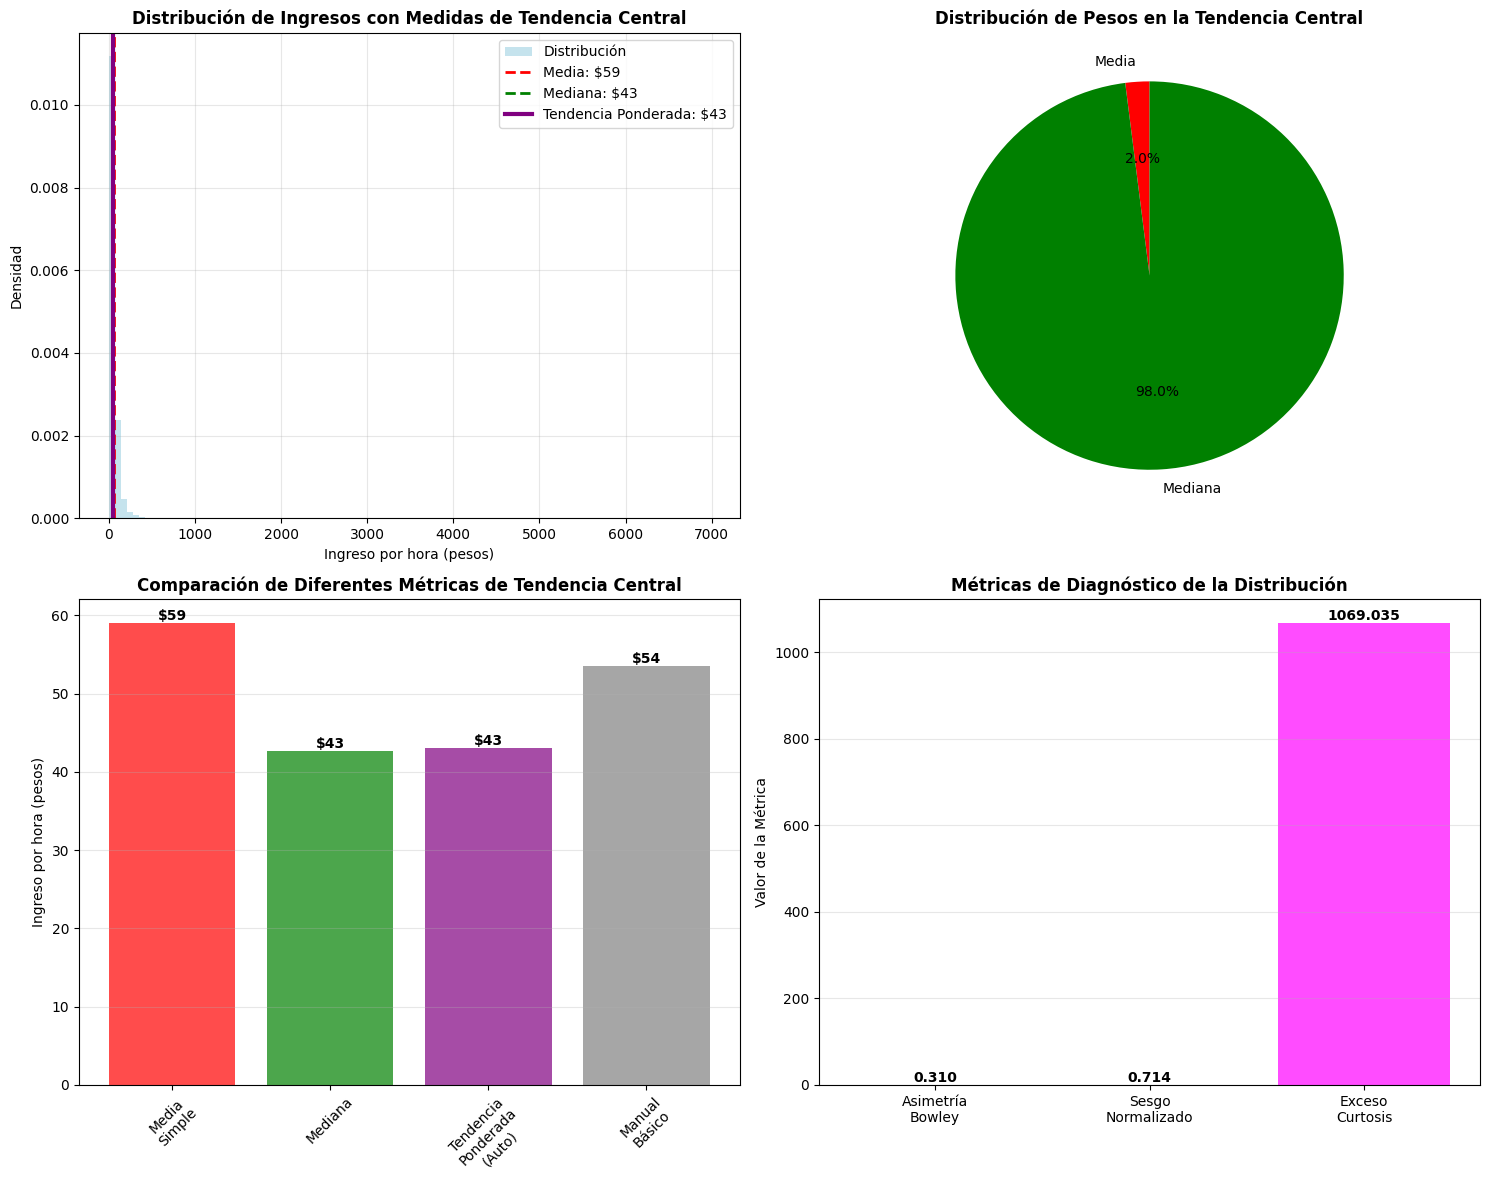


📋 TABLA RESUMEN DE RESULTADOS:
                   Métrica  Valor  Peso Media  Peso Mediana Incluye Moda
              Media Simple $59.07       1.000         0.000           No
                   Mediana $42.71       0.000         1.000           No
Tendencia Ponderada (Auto) $43.04       0.020         0.980           No
      Configuración Manual $53.55       0.662         0.338           No

🎯 CONCLUSIÓN:
La función automática eligió una configuración alta de asimetría
y aplicó el método 'exponential' con ponderación 'softmax'
El resultado final de $43.04 representa mejor
la tendencia central que la media simple de $59.07


In [4]:
# ========== VISUALIZACIÓN DE RESULTADOS ==========

# Crear visualización comparativa
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Distribución con medidas de tendencia central
ax1.hist(ingreso, bins=100, alpha=0.7, color='lightblue', density=True, label='Distribución')
ax1.axvline(resultado['media'], color='red', linestyle='--', linewidth=2, label=f'Media: ${resultado["media"]:,.0f}')
ax1.axvline(resultado['mediana'], color='green', linestyle='--', linewidth=2, label=f'Mediana: ${resultado["mediana"]:,.0f}')
ax1.axvline(resultado['tendencia_ponderada'], color='purple', linestyle='-', linewidth=3, 
           label=f'Tendencia Ponderada: ${resultado["tendencia_ponderada"]:,.0f}')

if not pd.isna(resultado['moda']):
    ax1.axvline(resultado['moda'], color='orange', linestyle=':', linewidth=2, label=f'Moda: ${resultado["moda"]:,.0f}')

ax1.set_title('Distribución de Ingresos con Medidas de Tendencia Central', fontweight='bold')
ax1.set_xlabel('Ingreso por hora (pesos)')
ax1.set_ylabel('Densidad')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Pesos asignados
if resultado['peso_moda'] > 0:
    labels = ['Media', 'Mediana', 'Moda']
    sizes = [resultado['peso_media'], resultado['peso_mediana'], resultado['peso_moda']]
    colors = ['red', 'green', 'orange']
else:
    labels = ['Media', 'Mediana']
    sizes = [resultado['peso_media'], resultado['peso_mediana']]
    colors = ['red', 'green']

ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribución de Pesos en la Tendencia Central', fontweight='bold')

# Gráfico 3: Comparación de métodos
metodos = ['Media\nSimple', 'Mediana', 'Tendencia\nPonderada\n(Auto)', 'Manual\nBásico']
valores = [resultado['media'], resultado['mediana'], 
          resultado['tendencia_ponderada'], resultado_manual['tendencia_ponderada']]

bars = ax3.bar(metodos, valores, color=['red', 'green', 'purple', 'gray'], alpha=0.7)
ax3.set_title('Comparación de Diferentes Métricas de Tendencia Central', fontweight='bold')
ax3.set_ylabel('Ingreso por hora (pesos)')
ax3.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold')

ax3.grid(True, alpha=0.3, axis='y')

# Gráfico 4: Métricas de diagnóstico
diagnostico_labels = ['Asimetría\nBowley', 'Sesgo\nNormalizado', 'Exceso\nCurtosis']
diagnostico_valores = [diagnostico['bowley_asimetria'], 
                      diagnostico['sesgo_normalizado'], 
                      abs(diagnostico['exceso_curtosis'])]

bars2 = ax4.bar(diagnostico_labels, diagnostico_valores, color=['blue', 'cyan', 'magenta'], alpha=0.7)
ax4.set_title('Métricas de Diagnóstico de la Distribución', fontweight='bold')
ax4.set_ylabel('Valor de la Métrica')

# Añadir valores en las barras
for bar, valor in zip(bars2, diagnostico_valores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{valor:.3f}', ha='center', va='bottom', fontweight='bold')

ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ========== TABLA RESUMEN ==========
print("\n📋 TABLA RESUMEN DE RESULTADOS:")
print("=" * 80)

resumen_data = {
    'Métrica': ['Media Simple', 'Mediana', 'Tendencia Ponderada (Auto)', 'Configuración Manual'],
    'Valor': [f"${resultado['media']:,.2f}", f"${resultado['mediana']:,.2f}", 
              f"${resultado['tendencia_ponderada']:,.2f}", f"${resultado_manual['tendencia_ponderada']:,.2f}"],
    'Peso Media': [1.0, 0.0, resultado['peso_media'], resultado_manual['peso_media']],
    'Peso Mediana': [0.0, 1.0, resultado['peso_mediana'], resultado_manual['peso_mediana']],
    'Incluye Moda': ['No', 'No', 'Sí' if not pd.isna(resultado['moda']) else 'No', 'No']
}

resumen_df = pd.DataFrame(resumen_data)
print(resumen_df.to_string(index=False, float_format='%.3f'))

print(f"\n🎯 CONCLUSIÓN:")
print(f"La función automática eligió una configuración {diagnostico['nivel_asimetria']} de asimetría")
print(f"y aplicó el método '{params['method']}' con ponderación '{params['weight_method']}'")
print(f"El resultado final de ${resultado['tendencia_ponderada']:,.2f} representa mejor")
print(f"la tendencia central que la media simple de ${resultado['media']:,.2f}")